Question1
ChatBot helped me understand:
Classification decision trees are used for categorical problems, like predicting if a patient has a disease (0/1 classification).
Predictions are made by progressively splitting decision nodes in a tree.
Unlike linear regression, decision trees are better suited for non-linear relationships.


Question2
Accuracy: Suitable for scenarios with high overall correctness, e.g., traffic signal detection.
Sensitivity: Crucial for detecting positive outcomes, e.g., disease screening.
Specificity: Vital for minimizing false negatives, e.g., criminal justice cases.
Precision: Key in reliable predictions, e.g., product recommendation systems.


Question3

In [1]:
import pandas as pd

#Load Data
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

#Remove Unnecessary Columns
ab = ab.drop(columns=["Weight_oz", "Width", "Height"])

#Remove Rows with Missing Values
ab = ab.dropna()

#Convert Data Types
ab["Pub year"] = ab["Pub year"].astype(int)
ab["NumPages"] = ab["NumPages"].astype(int)
ab["Hard_or_Paper"] = ab["Hard_or_Paper"].astype("category")

#Check Data Info
print(ab.info())


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None


Question4

[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paper'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paper'),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]\nclass = Paper'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127, 11]\nclass = Paper'),
 Text(0.75, 0.5, 'List Price <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [28, 44]\nclass = Hard'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [13, 36]\nclass = Hard'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]\nclass = Paper')]

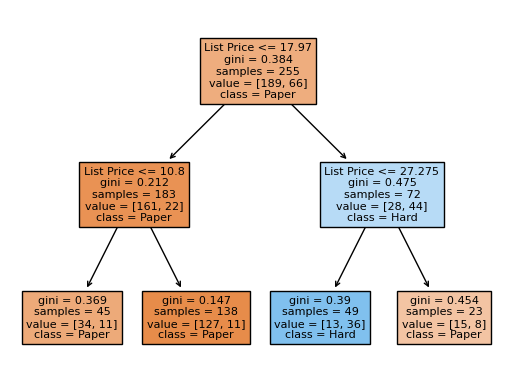

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

#Split Data
X = ab[["List Price"]]
y = pd.get_dummies(ab["Hard_or_Paper"])["H"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Decision Tree
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

#Visualize Decision Tree
plot_tree(clf, feature_names=["List Price"], class_names=["Paper", "Hard"], filled=True)


Question5

[Text(0.5, 0.9, 'NumPages <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paper'),
 Text(0.25, 0.7, 'NumPages <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paper'),
 Text(0.125, 0.5, 'NumPages <= 7.86\ngini = 0.369\nsamples = 45\nvalue = [34, 11]\nclass = Paper'),
 Text(0.0625, 0.3, 'NumPages <= 5.47\ngini = 0.111\nsamples = 17\nvalue = [16, 1]\nclass = Paper'),
 Text(0.03125, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Paper'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = Paper'),
 Text(0.1875, 0.3, 'NumPages <= 7.97\ngini = 0.459\nsamples = 28\nvalue = [18, 10]\nclass = Paper'),
 Text(0.15625, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Hard'),
 Text(0.21875, 0.1, 'gini = 0.375\nsamples = 24\nvalue = [18, 6]\nclass = Paper'),
 Text(0.375, 0.5, 'NumPages <= 16.97\ngini = 0.147\nsamples = 138\nvalue = [127, 11]\nclass = Paper'),
 Text(0.3125, 0.3, 'NumPages <= 13.56\ngini = 0.12\nsamples = 125\nvalu

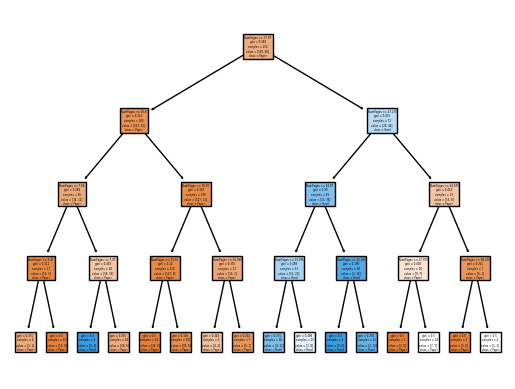

In [3]:
#Train Multi-Feature Decision Tree
X_multi = ab[["NumPages", "Thick", "List Price"]]
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)
#Visualization
plot_tree(clf2, feature_names=["NumPages", "Thick", "List Price"], class_names=["Paper", "Hard"], filled=True)

Question6

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

#Predict and Generate Confusion Matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

#Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)  # TP/(TP+FN)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # TN/(TN+FP)

print(f"Accuracy: {accuracy:.3f}")
print(f"Sensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")


Accuracy: 0.844
Sensitivity: 0.700
Specificity: 0.909


Question8

In [5]:
#Feature Importance Analysis
feature_importances = clf2.feature_importances_
print("Feature Importances:", dict(zip(["NumPages", "Thick", "List Price"], feature_importances)))

Feature Importances: {'NumPages': 1.0}


Chat Bot Link: https://chatgpt.com/share/673f79c7-65f4-8001-b9a3-71f48d114acc